In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
X = df_cancer.drop(['target'], axis = 1)
X. head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y = df_cancer['target']
y.head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)


In [6]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

F:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
y_predict = svc_model.predict(X_test)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict, labels = [1,0]))
confusion = pd.DataFrame(cm, index = ['is_cancer', 'is_healthy'], 
                         columns = ['predicted_cancer', 'predicted_healthy'])
confusion


,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,48,0


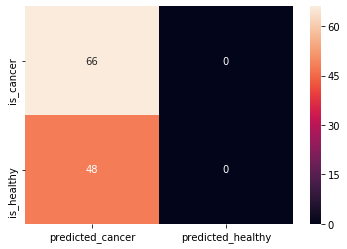

In [9]:
sns.heatmap(confusion,annot=True)

In [10]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        48
         1.0       0.58      1.00      0.73        66

    accuracy                           0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114



F:\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)
X_scaledt = preprocessing.scale(X_test)
X_scaled

array([[-1.34450029,  0.5346355 , -1.32325205, ..., -1.34334388,
        -0.84057964,  0.48739774],
       [ 3.77500369,  1.58209417,  3.89649166, ...,  2.25906721,
        -0.39639035, -0.51916346],
       [-0.12789731, -0.68625859, -0.17338951, ..., -0.40950938,
        -0.11981967, -0.31830386],
       ...,
       [-0.8067862 , -1.4370514 , -0.81092486, ..., -0.40251322,
        -0.24218124, -0.18251146],
       [-0.92324831, -0.84828378, -0.88563924, ..., -0.52175203,
        -0.49696151,  1.38928563],
       [-0.44603771, -0.06097825, -0.41313236, ..., -0.32418671,
        -1.26800706, -0.65439007]])

In [20]:
svc_model = SVC()
svc_model.fit(X_scaled, y_train)
y_predict = svc_model.predict(X_scaledt)
cm = confusion_matrix(y_test,y_predict)

In [24]:
cm = np.array(confusion_matrix(y_test,y_predict, labels = [1,0]))
confusion = pd.DataFrame(cm, index = ['is_cancer', 'is_healthy'], 
                         columns = ['predicted_cancer', 'predicted_healthy'])
confusion

[[66  0]
 [ 3 45]]


,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,3,45


In [23]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        48
         1.0       0.96      1.00      0.98        66

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

